In [1]:
import Date
import datetime
import requests
import numpy as np
import Solar
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd

In [10]:
cloud = np.zeros(31)
insolance = np.zeros(31)

for q in range(31):

    daywanted = q+1+31*4
    date = Date.getdatewanted(daywanted, 2014)
    date_string = date
    date = datetime.datetime.strptime(date_string, "%m/%d/%Y")
    timestamp = datetime.datetime.timestamp(date)
    timestamp = round(timestamp)
    date = str(timestamp)

    response = requests.get('https://api.darksky.net/forecast/2e3b8852d632edf46296b8e13bf6dc07/51.7520,1.2577,' + date)
    response = response.json()

#     cloud_cover = np.zeros(24)
    cloud_cover = []
    for n in range(24):
    

        if 'cloudCover' in response['hourly']['data'][n]:
            cloud_cover.append(response['hourly']['data'][n]['cloudCover'])

    
#     cloud[q] = cloud_cover.sum()
    cloud[q] = np.sum(cloud_cover)
    insolance[q] = Solar.getinsolance(daywanted).sum()[0]
    
    print(len(cloud_cover), cloud[q], insolance[q])
    
    

19 10.2 4.384
24 13.09 5.793
24 12.010000000000002 5.5
24 17.1 1.906
24 10.97 5.948
24 15.63 5.042
24 16.44 4.0120000000000005
24 13.14 4.62
24 12.25 4.186
24 6.210000000000001 6.162000000000001
23 4.880000000000001 5.981
23 7.250000000000001 4.924
24 8.209999999999999 5.278
23 1.0799999999999998 6.109
21 4.66 5.616
23 11.359999999999998 3.157
24 16.78 4.949000000000001
24 11.54 3.861
24 6.62 5.178
24 11.65 4.115
24 7.98 6.311
24 13.3 2.184
24 20.0 5.260999999999999
24 20.560000000000002 1.839
24 17.17 4.902
24 14.450000000000001 4.436999999999999
24 9.93 4.349
24 7.5 5.558
24 12.290000000000001 3.8200000000000003
24 14.549999999999999 3.688
24 15.04 2.582


In [11]:
'''
just for march !!!!!
'''
# insolance = np.delete(insolance, [23,24,25,26,27])
# cloud = np.delete(cloud, [23,24,25,26,27])

'''
just for march!!!!!
'''

'\njust for march!!!!!\n'

In [12]:
slope, intercept, r_value, p_value, std_err = stats.linregress(cloud, insolance)


(0, 6.549776600441501)

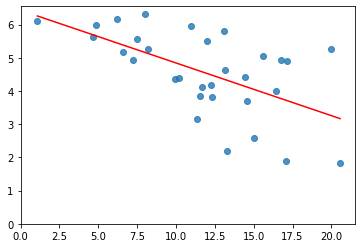

In [13]:
fig, ax = plt.subplots()

ax.scatter(cloud, insolance, alpha=0.8)
ax.plot([min(cloud), max(cloud)], [slope*min(cloud) + intercept, slope*max(cloud) + intercept], color='red') # predicted
ax.set_xlim(0)
ax.set_ylim(0)

In [14]:
threshold = 1.5

temp = cloud*insolance
z = np.abs(stats.zscore(temp))
cloud_new = cloud[(z < threshold)]
insolance_new = insolance[(z < threshold)]

slope_new, intercept_new, r_value, p_value, std_err = stats.linregress(cloud_new, insolance_new)

In [15]:
# cloud1=cloud
# insolance1=insolance
# cloud_new1= cloud_new
# insolance_new1=insolance_new
# slope_new1=slope_new
# intercept_new1=intercept_new
# slope1=slope
# intercept1=intercept

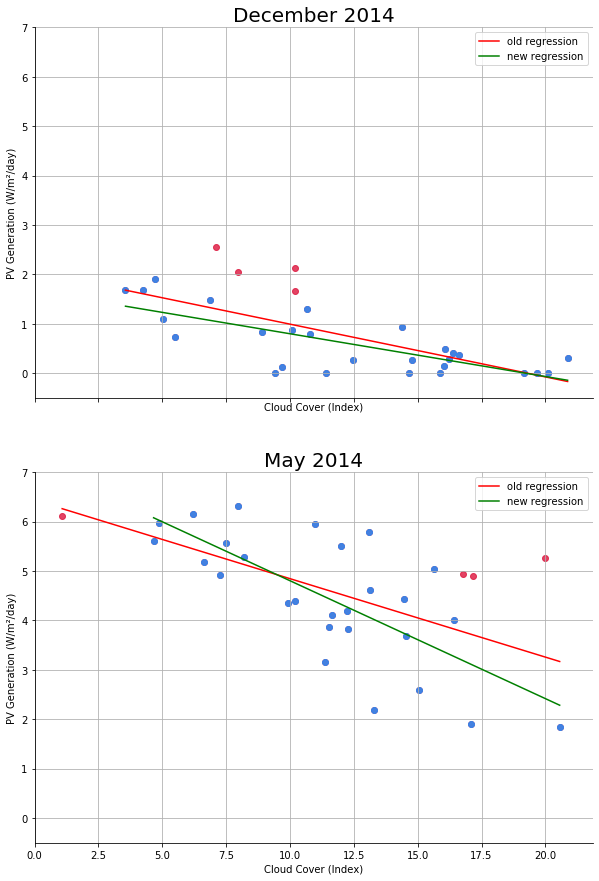

In [21]:
fig, ax = plt.subplots(2,1,sharex = True,figsize=[10,15])

ax[0].scatter(cloud1, insolance1,color='crimson', alpha=0.8)
ax[0].scatter(cloud_new1, insolance_new1,color='dodgerblue', alpha=0.8)
ax[0].plot([min(cloud1), max(cloud1)], [slope1*min(cloud1) + intercept1, slope1*max(cloud1) + intercept1], color='red', label='old regression') # predicted
ax[0].plot([min(cloud_new1), max(cloud_new1)], [slope_new1*min(cloud_new1) + intercept_new1, slope_new1*max(cloud_new1) + intercept_new1], color='green', label='new regression')
ax[0].set_xlim(0)
ax[0].set_ylim(-0.5,7)
ax[0].set_xlabel('Cloud Cover (Index)')
ax[0].set_ylabel('PV Generation (W/m²/day)')
ax[0].legend(loc=1)
ax[0].set_title('December 2014', fontsize=20)
ax[0].grid()
ax[0].spines['right'].set_visible(False)
ax[0].spines['top'].set_visible(False)

ax[1].scatter(cloud, insolance,color='crimson', alpha=0.8)
ax[1].scatter(cloud_new, insolance_new,color='dodgerblue', alpha=0.8)
ax[1].plot([min(cloud), max(cloud)], [slope*min(cloud) + intercept, slope*max(cloud) + intercept], color='red', label='old regression') # predicted
ax[1].plot([min(cloud_new), max(cloud_new)], [slope_new*min(cloud_new) + intercept_new, slope_new*max(cloud_new) + intercept_new], color='green', label='new regression')
ax[1].set_xlim(0)
ax[1].set_ylim(-0.5,7)
ax[1].set_xlabel('Cloud Cover (Index)')
ax[1].set_ylabel('PV Generation (W/m²/day)')
ax[1].legend(loc=1)
ax[1].set_title('May 2014',fontsize=20)
ax[1].grid()
ax[1].spines['right'].set_visible(False)
ax[1].spines['top'].set_visible(False)

In [17]:
print(slope_new, intercept_new)

-0.23857206110069504 7.1890532662409505
